# Reinforcement Learning


Reinforcement Learning is a **computational approach** to understanding and automating goal-directing learning and decision making.

It is distiguished from other machine learning approaches by its emphasis on *learning by an agent* from direct interaction with its environment, without requiring exemplary supervison or complete model of the environment. 

It has its roots in **optimal control** and **dynamic programming** from the late 50s, strengthen in the late 80s by ideas  from psychology inspired on **animal learning** experiments from the begining of the century and the concept of **learning by trial and error**.

The word *Reinforcement* was first introduced in the 1927 English translation of Pavlov's monograph on conditioned reflexes.

---

## Content Table

* Introduction to the Reinforcement Learning **Problem**
* **Model-based** Methods
* **Model-free** Methods

---

## The Problem

Reinforcement learning is learning **what to do** — how to map situations to actions.

In its purest and most abstract form we have **an active decision-making agent** interacting with its **environment** seeking to achieve a **goal** despite potential uncertainty about its environment.

The **goal** of the agent is codified in terms of **rewards** received at each time-step. The agent's sole objective is to **maximise the total reward** it receives.

This is a very profund concept and central to Reinforcement Learning, called the **reward hypothesis**,

> All goals and purposes can be formalised as the maximisation of the expected value of the cumulative sum of a received scalar signal (called reward).

**Reward Signals Designing** is a discipline in itself in Reinforcement Learning cutting-hedge research.

<br>
<figure>
  <img src = "./text_images/RL.png" width = 80% style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align: center; font-style: italic">Fig 1. - Reinforcement Learning.</figcaption>
</figure> 
<br>

Formally, we define the Problem at this point as a *finite* **Markov Decision Process** (MDP).

> *Finite* - because we start with environments that can be defined by a finite set of states $\mathcal{S}$, actions $\mathcal{A}$ and rewards $\mathcal{R}\subset\mathbb{R}$.

The agent-evironment interaction is defined by *trajectories*, 
$$ S_0, A_0, R_1, S_1, A_1, R_2, S_2, A_2, R_3, \dots$$

sequences of states $S_t\in\mathcal{S}$ of the environment, actions $A_t\in\mathcal{A}(S_t)$ taken by the agent, rewards $R_t\in\mathcal{R}$ received by the agent at each time-step $t$.

> *Markov* - because the dynamics of the environment will be fully defined by the function $p$,
$$ p(S_{t+1}, R_{t+1} \mid S_t, A_t) = \mathbb{P}(S_{t+1}, R_{t+1} \mid S_t, A_t)$$

In an MPD, the next state $S_{t+1}$ of the environemnt and reward $R_{t+1}$ received by the agent will only depend on the previous state $S_t$ of the environment and the last action $A_t$ taken by the agent.  

If $p$ is known, or the agent uses a **model** of $p$ for **planning** - deciding on a course of action by considering possible future situations before they are actually experienced - we say that a **model-based method** has been used.

Before, moving on to *model-based methods* of solving the Reinforcement Learning Problem, we need to pause and discuss the existence of terminal states,

$$S_T\in\mathcal{S}: \mathcal{A}(S_T) = \emptyset$$

If the MDP has no terminal state and the task is continuous, the expected return of future rewards $G_t$,

$$ G_t = R_{t+1} + R_{t+2} + R_{t+3} + R_{t+4} + \dots $$

can be ill defined.


We need to regularise $G_t$ by introducing a regularisation factor $\gamma\in [0,1]$, 

$$ G_t = R_{t+1} + \gamma \cdot R_{t+2} + \gamma^2 \cdot R_{t+3} + \gamma^3 \cdot R_{t+4} + \dots $$

It has the same function as a discount factor in Finance. It is the final defining element of the structure of an $\mathbf{MDP}(\mathcal{S}, \mathcal{A}, \mathcal{R}, p, \gamma)$ and it will have a preponderant role in the agents propensity to defer gratification.

---

## Model-based Methods

The best way to intrduced Model-based Methods is by solving one classical example of Reinforcement Learning: **The Gambler's Problem**

> A gambler has the opportunity to make bets on the outcomes of a sequence of [coin flips](https://www.ripleys.com/weird-news/coin-toss-or-not/). If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP. 

We can codify the problem as a MDP using:
* a state space $\mathcal{S} = \{0, 1, 2, ..., 99, 100\}$ representing the gambler's capital,
* an action space $\mathcal{A}(s) = \{0, 1, \dots , min(s, 100 - s) \}$ at each state $s$ of the posible stakes,
* a reward of zero for all transitions except those which the gambler reaches his goal, for which we can assign a reward of +1.
* in this case we will use a $\gamma = 1$ discount factor, it is an episodic task.

Once we establish the probability of getting "heads" in the coin toss - $p_H$ - we are able to fully define $p(S_{t+1}, R_{t+1} \mid S_t, A_t)$.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

target = 100
p_H = 0.5
r = np.array([0,1])
gamma = 1

def p_model(p_H, target):
    p = np.zeros((target+1, 2, target+1, target//2+1))

    for state in range(target):
        max_action = min(state, target - state)
        for action in range(max_action + 1):
            #coin toss win
            if state+action == target:
                p[state+action, 1, state, action] = p_H
            else:
                p[state+action, 0, state, action] = p_H
            #coin toss loss    
            p[state - action, 0, state, action] = 1 - p_H
            
    return p

p = p_model(p_H, target)

The Problem is solved when we find the optimal **Policy** that maximises the expected return $G_t$ of the Agent - in this case by increasing the chances of reaching 100 coins of capital.

A **Policy** $\pi$ is a function that codifies for each state $s$ what is the action $a$ that the agent will take,
$$ a = \pi(s) $$

we can also have stochastic policies $\pi$ where $\pi(a \mid s)$ represents the probability of agent choosing action $a$ when in state $s$.

For example, we can define the uniform policy $\pi_u$ as the starting policy for the agent, where each allowed action $a$ in each state $s$ have equal probability to be chosen by the agent.

In [378]:
pi_u = np.zeros((target+1, target//2 +1))
for state in range(target+1):
    action_num = min(state, target - state)
    if action_num != 0:
        prob = 1 / action_num
        for action in range(action_num):
            pi_u[state, action + 1] = prob 



> Being a **Markov** Decision Process - p only depends on 2 states - we can solve the problem using *Dynamic Programming* methods, initially developed by [Bellman](https://www.amazon.co.uk/Dynamic-Programming-Dover-Computer-Science/dp/0486428095). We have *overlapping subproblems* and *optimal substructure* for the use of **memoisation**. 

Let's define a **value funtion** $v_{\pi_u}$ related to the policy $p_u$ as the expectation of return $G_t$ when agent is in state $S_t = s$,
$$ v_{\pi_u}(s) = \mathbb{E}_{\pi_u}[G_t\mid S_t = s] $$ 

Expanding $G_t$, 
$$ v_{\pi_u}(s) = \mathbb{E}_{\pi_u}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \dots \mid S_t = s] $$
$$ v_{\pi_u}(s) = \mathbb{E}_{\pi_u}[R_{t+1} + \gamma \mathbb{E}_{\pi_u}[G_{t+1}\mid S_{t+1} = s']   \mid S_t = s] $$

we arrive at the **Bellman's equation** for a policy value function,
$$ v_{\pi_u}(s) = \mathbb{E}_{\pi_u}[R_t + \gamma v_{\pi_u}(s')   \mid S_t = s] $$

In terms of model $p$ and policy $\pi_u$ the equation can be written,
$$ v_{\pi_u}(s) = \sum_{a\in \mathcal{A}(s)} \pi(a \mid s) \sum_{s'\in \mathcal{S}, r\in \mathcal{R}} p(s', r \mid s, a)\;\big(r +\gamma v_{\pi_u}(s')\big) $$

This is a system of $\lvert \mathcal{S} \rvert$ simultaneous linear equations with $\lvert \mathcal{S} \rvert$ variables, so solvable by linear methods.

But for our purpose, it is useful to discuss iterative methods, where the Bellman's equation becomes an assignment rule that updates $v_{\pi_u}$ value function at each step,
$$ v_{k+1}(s) \leftarrow \sum_{a\in \mathcal{A}(s)} \pi(a \mid s) \sum_{s'\in \mathcal{S}, r\in \mathcal{R}} p(s', r \mid s, a)\;\big(r +\gamma v_k(s')\big) $$

for $k \rightarrow \infty$, it can be shown that $v_k$ will tend to the *fixed point* solution $v_{\pi_u}$ of the update rule defined.

This is how the **iterative policy evaluation** method is defined. We can start with an arbitrary value function $v_0$ and create a sequence of approximations using the update rule until the approximation error is below a certain predefined level $\epsilon$.

Defining the update rule based of Bellman's equation,

In [381]:
def bellman(p, pi, r, target, v_pi, gamma):
    v = np.zeros((target+1, 1))
    for state_start in range(1, target):
        for reward in range(2):
            
            for state_end in range(target + 1):
                for action in range(1, target//2 + 1):
                    v[state_start, 0] +=  pi[state_start, action] * p[state_end, reward, state_start, action] * (r[reward] + gamma * v_pi[state_end, 0])
        
    return v

Defining the *iterative policy evaluation*,

In [382]:
def iter_pol_eval(p, pi, r, target, gamma):
    error = 1e-2
    v_pi = np.zeros((target+1, 1))
    v = np.zeros((target+1, 1))
    values = []
    values.append(v_pi)
    delta = np.inf
    while delta > error:
        v = bellman(p, pi, r, target, v_pi, gamma)
        values.append(v)
        delta = max(abs(v-v_pi))
        v_pi = v
    return values

We can now test the method,

In [383]:
import time
t_0 = time.time()
value_functions = iter_pol_eval(p, pi_u, r, target, gamma)
elapsed_time = time.time() - t_0
print("Elapsed time: ", elapsed_time)

Elapsed time:  73.25525879859924


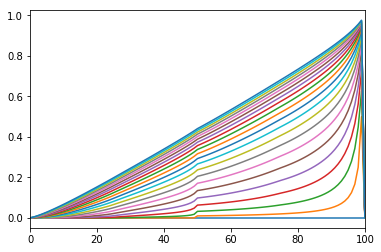

In [384]:
val_funcs = pd.DataFrame(np.squeeze(np.array(value_functions)).T)
val_funcs.plot(legend=False)

The code can be made to run faster by parallelising it...

In [385]:
def bellman_par(p, pi, r , target, v, gamma):
    
     return np.sum(np.matmul(np.tensordot(p, r + gamma * v, axes = ([0,1], [0,1])),pi.T)*np.identity(target+1), axis=-1, keepdims=True)

In [386]:
def iter_pol_eval_par(p, pi, r, target, gamma):
    error = 1e-2
    v_pi = np.zeros((target+1, 1))
    v = np.zeros((target+1, 1))
    values = []
    values.append(v_pi)
    delta = np.inf
    while delta > error:
        v = bellman_par(p, pi, r, target, v_pi, gamma)
        values.append(v)
        delta = max(abs(v-v_pi))
        v_pi = v
    return values

In [388]:
t_0 = time.time()
value_functions = iter_pol_eval_par(p, pi_u, r, target, gamma)
elapsed_time = time.time() - t_0
print("Elapsed time: ", elapsed_time)

Elapsed time:  0.010302066802978516


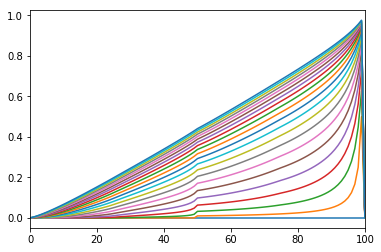

In [389]:
val_funcs = pd.DataFrame(np.squeeze(np.array(value_functions)).T)
val_funcs.plot(legend=False)

The next useful function that help us understand how to optimise the policy and solve the problem is called **action-value function** $q_{\pi_u}(s, a)$ defined as,

$$ q_{\pi_u} (s, a) = \mathbb{E}_{\pi_u} [G_t\mid S_t = s, A_t = a] $$

and expresses the value of performing action $a$ at time $t$ and continue using the policy $\pi_u$ thereafter until the end of the episode.

Using the Bellman's trick again we can write $q_{\pi_u} (s, a)$ as,

$$ q_{\pi_u} (s, a) = \sum_{s'\in \mathcal{S}, r\in \mathcal{R}} p(s', r \mid s, a)\;\big(r +\gamma v_{\pi_u}(s')\big)  $$

If there are particular actions at a state $s$ that maximise $q_{\pi_u} (s, a)$ those should be prefered in the policy for that particular state $s$ in order extract a higher reward from the environment and optimise the value function.

In [390]:
def q(p, r , v, gamma):
    return np.tensordot(p, r + gamma * v, axes = ([0,1], [0,1]))

In [391]:
q_pi = q(p, r,value_functions[-1], gamma)

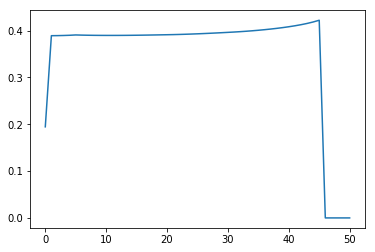

In [392]:
plt.plot(q_pi[45, :])

In [395]:
np.argmax(q_pi[45,:])

45

We can see that there should be a prefered action for each particular state.

We can then alter *Bellman's equation for the value function of a policy* in order to obtain the **Bellman's equation** for the **optimal value function** $v_*$,

$$ v_*(s) = \smash{\displaystyle\max_{a \in \mathcal{A}(s)}} \sum_{s'\in \mathcal{S}, r\in \mathcal{R}} p(s', r \mid s, a)\;\big(r +\gamma v_*(s')\big) $$

And, again using *Bellman's equation* as an iterative update rule we can calculate the *optimal value function* $v_*$ by iteration,

In [396]:
def iter_opt_val_par(p, r, target, gamma):
    error = 1e-30
    v_opt = np.zeros((target+1, 1))
    v = np.zeros((target+1, 1))
    values = []
    values.append(v_opt)
    delta = np.inf
    while delta > error:
        a = q(p, r, v_opt, gamma)
        v = np.max(q(p, r, v_opt, gamma), axis=1, keepdims=True)
        values.append(v)
        delta = np.max(np.abs(v-v_opt))
        v_opt = v
    return values

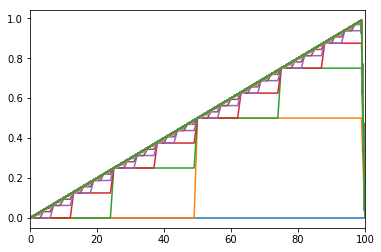

In [397]:
value_functions = iter_opt_val_par(p, r, target, gamma)
val_funcs = pd.DataFrame(np.squeeze(np.array(value_functions)).T)
val_funcs.plot(legend=False)

We can in the same fashion as before calculate the **optimal action-value function** $q_*$ from the optimal value function in order to determine the set of **optimal policies** - also known as **greedy policies** has they are designed to extract the maximal value from the environment,

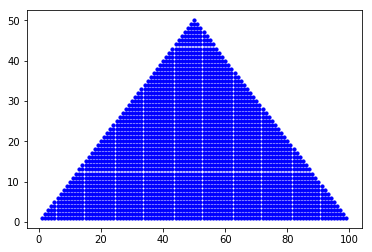

In [398]:
q_opt = q(p, r,value_functions[-1], gamma)
q_opt_trunc = np.around(q_opt, decimals=12)
points = []
for state in range(1, target):
    all_action_values_per_state = q_opt_trunc[state,:]
    optimal_actions_per_state = np.argwhere(all_action_values_per_state == np.amax(all_action_values_per_state))
    for action in optimal_actions_per_state.flatten().tolist():
        points.append([state, action])
X=[]
Y=[]
for point in points:
    X.append(point[0])
    Y.append(point[1])

plt.scatter(X, Y, s=10, c='b', marker='o')
    

For the case of a fair coin, this example is not the most interesting, as any action seems to yield the same result, so any policy is an *optimal policy*. But, if we have a biased coin with lower winning probability, suddenly the set of optimal policies for this problem  acquire an interesting structure.

For an "heads" probability of 25%, we have a richer *value function* with varying gradient,

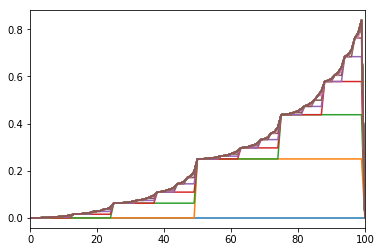

In [399]:
p_H =0.25
p = p_model(p_H, target)
value_functions = iter_opt_val_par(p, r, target, gamma)
val_funcs = pd.DataFrame(np.squeeze(np.array(value_functions)).T)
val_funcs.plot(legend=False)

and the *optimal policy* space gets significantly reduced to a fractal-like solution,

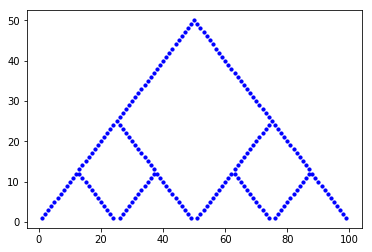

In [400]:
q_opt = q(p, r,value_functions[-1], gamma)
q_opt_trunc = np.around(q_opt, decimals=12)
points = []
for state in range(1, target):
    all_action_values_per_state = q_opt_trunc[state,:]
    optimal_actions_per_state = np.argwhere(all_action_values_per_state == np.amax(all_action_values_per_state))
    for action in optimal_actions_per_state.flatten().tolist():
        points.append([state, action])
X=[]
Y=[]
for point in points:
    X.append(point[0])
    Y.append(point[1])

plt.scatter(X, Y, s=10, c='b', marker='o')

Expanding the state space size $\lvert \mathcal{S} \rvert$ - especially to larger multiples of 2 - the optimal policy space develops further into a *Sierpiński triangle*-like structure.

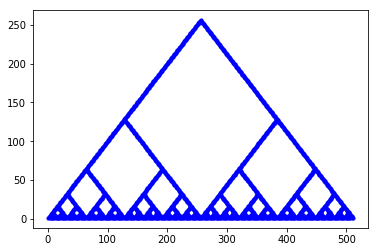

In [401]:
p_H =0.25
target = 512
p = p_model(p_H, target)
value_functions = iter_opt_val_par(p, r, target, gamma)
val_funcs = pd.DataFrame(np.squeeze(np.array(value_functions)).T)
q_opt = q(p, r,value_functions[-1], gamma)
q_opt_trunc = np.around(q_opt, decimals=12)
points = []
for state in range(1, target):
    all_action_values_per_state = q_opt_trunc[state,:]
    optimal_actions_per_state = np.argwhere(all_action_values_per_state == np.amax(all_action_values_per_state))
    for action in optimal_actions_per_state.flatten().tolist():
        points.append([state, action])
X=[]
Y=[]
for point in points:
    X.append(point[0])
    Y.append(point[1])

plt.scatter(X, Y, s=10, c='b', marker='o')

Next, we will look into Model-free methods. They allow us to solve MDPs without having to utilise the environments transition function $p(S_{t+1}, R_{t+1} \mid S_t, A_t)$. This is extremely useful because most problems are based in environments with quite complex transition functions, not easy to define,  if at all known.

---

## Model-free Methods

In most environments we will have incomplete information. We will explore them in order to determine the optimal policy $\pi_*$ and solve the problem. It is using model-free methods that we most easily recognise the agent "learning" behaviour.

### Monte Carlo Control

The most natural exploratory method to write is based on Monte Carlo methods. We basically expose the agent to every possible initial conditions - all the states in $\mathcal{S}$ - and let it create a large amount of tragectories using its policy $\pi$ so we can collect the returns $G_t$ and calculate its value function $v_\pi$ and action-value function $q_\pi$.

$$ q_{\pi} (S_t, A_t) = \frac{\sum_{episodes} G_t} {N(S_t, A_t)}\quad , \quad v_{\pi} = q_{\pi}(S_t, \pi(S_t)),$$ 

where $N(S_t, A_t)$ is the number of times the pair state $S_t$ and action $A_t$ have been experienced in the trajectories produced.

So far so good... BUT we want to calculate the optimal value function $v_{\pi_*}$ for the greedy policy $\pi_*$, and we do not know what that policy is initially!

So, we can start by randomly selecting actions and explore the environment at each state until we have more information about the value-action function $q$ at that state.

Let's be more precise and concrete by introducing another classical problem and try to solve it with the Monte Carlo Control method.

> **Blackjack** The object of the popular casino card game of blackjack is to obtain cards the sum of whose numerical values is as great as possible without exceeding 21. All face cards count as 10, and an ace can count either as 1 or as 11. We consider the version in which each player competes independently against the dealer. The game begins with two cards dealt to both dealer and player. One of the dealer’s cards is face up and the other is face down. If the player has 21 immediately (an ace and a 10-card), it is called a natural. He then wins unless the dealer also has a natural, in which case the game is a draw. If the player does not have a natural, then he can request additional cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust). If he goes bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks according to a fixed strategy without choice: he sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win, lose, or draw—is determined by whose final sum is closer to 21.

We now load packages and auxiliary files, namely the *gym package* developed by [OpenAI](https://openai.com/) - one of the most influencial AI research companies. 

In [3]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import random

from plot_utils import plot_blackjack_values, plot_policy

Use the code cell below to create an instance of the [Blackjack](https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py) environment.

In [4]:
env = gym.make('Blackjack-v0')

Each state is a 3-tuple of:
- the player's current sum $\in \{0, 1, \ldots, 31\}$,
- the dealer's face up card $\in \{1, \ldots, 10\}$, and
- whether or not the player has a usable ace (`no` $=0$, `yes` $=1$).

The agent has two potential actions:

```
    STICK = 0
    HIT = 1
```

Initially the agent will have a random policy but soon there will be some information about the value of the different actions $a$ at a specific state $s$ given by the state-value function $q(s,a)$, so we should start picking up that information and guide the agent to prefencially choose the *optimal action* - *greedy policy*. But that information on the first few visits is definitely incomplete so we should incentivise the agent to continue exploring, making sure the agent does not get stuck in a sub-optimal solution.

> The **Exploration-Exploitation Dilemma** - agents must find a way to balance the drive to behave optimally based on their current knowledge (exploitation) and the need to acquire knowledge to attain better judgment (exploration).

This is a long standing Dilemma encoutered and studied in various different fields also manifesting itself in the context of *Reinforcement Learning*. We tend to capture such tension by defining an $\epsilon$-greedy policy function, where an agent takes the optimal action with a probability $(1-\epsilon)$ and a random action with a probability $\epsilon$.

The following function defines the $\epsilon$-greedy policy,

In [404]:
def get_probs(Q_s, epsilon, nA):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    return policy_s

and this next function produces a *trajectory* using the $\epsilon$-greedy policy,

In [405]:
def generate_episode_from_Q(env, Q, epsilon, nA):
    """ generates an episode from following the epsilon-greedy policy """
    episode = []
    state = env.reset()
    while True:
        action = np.random.choice(np.arange(nA), p=get_probs(Q[state], epsilon, nA)) if state in Q else env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In order for MC control to converge to the optimal policy $\pi_*$, the **Greedy in the Limit with Infinite Exploration (GLIE) conditions** must be met:
* every state-action pair $(s, a)$ is visited infinitely many times, and
* the policy converges to a policy that is greedy with respect to the action-value function estimate $q_{\pi_*}$, $\epsilon \rightarrow 0$.

in practice we definitely do not visit every state-action pair an infinite amount of times and we will also not reduce $\epsilon$ below a certain minimum level in the algorithm because very small $\epsilon$ can be very time consuming in terms of solving the problem. It is a trade-off between resource consumption and precision of the results. We should set the number of visits and $\epsilon$-floor at a level that we are confortable with the noise in the results.

In the same vain, the typical update of the $q$ function when we revisit the state-action pair $(s,a)$ one more time from $N(s,a)-1$ to $N(s,a)$ will read,

$$
q(s,a) \leftarrow \frac{(N(s,a) - 1)*q(s,a) + G_t}{N(s,a)},
$$

that can be transformed into,

$$
q(s,a) \leftarrow q(s,a) + \frac{1}{N(s,a)}(G_t - q(s,a)).
$$


As $N(s,a)$ gets large the new information $\delta_t = G_t - q(s,a)$ has less impact on the update of $q(s, a)$. This is inefficient as at a later stage the $\delta_t$ information has better quality. The agent has learnt more, its policy is closer to greedy and rewards closer to the optimal level.

So, it is also benificial to bound the update rule for $q$ to a constant $\alpha$ parameter,

$$
q(s,a) \leftarrow q(s,a) + \alpha(G_t - q(s,a)).
$$

In [406]:
def update_Q(env, episode, Q, alpha, gamma):
    """ updates the action-value function estimate using the most recent episode """
    states, actions, rewards = zip(*episode)
    # prepare for discounting
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])
    for i, state in enumerate(states):
        old_Q = Q[state][actions[i]] 
        Q[state][actions[i]] = old_Q + alpha*(sum(rewards[i:]*discounts[:-(1+i)]) - old_Q)
    return Q

We are now in a position to fully define the Monte Carlo Control algorithm,

In [407]:
def mc_control(env, num_episodes, alpha, gamma=1.0, eps_start=1.0, eps_decay=.99999, eps_min=0.01):
    nA = env.action_space.n
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(nA))
    epsilon = eps_start
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        # set the value of epsilon
        epsilon = max(epsilon*eps_decay, eps_min)
        # generate an episode by following epsilon-greedy policy
        episode = generate_episode_from_Q(env, Q, epsilon, nA)
        # update the action-value function estimate using the episode
        Q = update_Q(env, episode, Q, alpha, gamma)
    # determine the policy corresponding to the final action-value function estimate
    policy = dict((k,np.argmax(v)) for k, v in Q.items())
    return policy, Q

The algorithm has seven arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `eps_start`: This is the starting value of epsilon.
- `eps_decay`: This is the decay rate of epsilon.
- `eps_min`: This is the minimum bound of epsilon.

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.
- `policy`: This is a dictionary where `policy[s]` returns the action that the agent chooses after observing state `s`.

We run the cell below to obtain the estimated optimal policy $\pi_*$ and action-value function $q_{\pi_*}$,

In [421]:
# obtain the estimated optimal policy and action-value function
t0 = time.time()
policy, Q = mc_control(env, 1000000, 0.01)
print("\nElapsed time: ", time.time() - t0)

Episode 1000000/1000000.
Elapsed time:  106.83543086051941


We can now plot the corresponding state-value function,

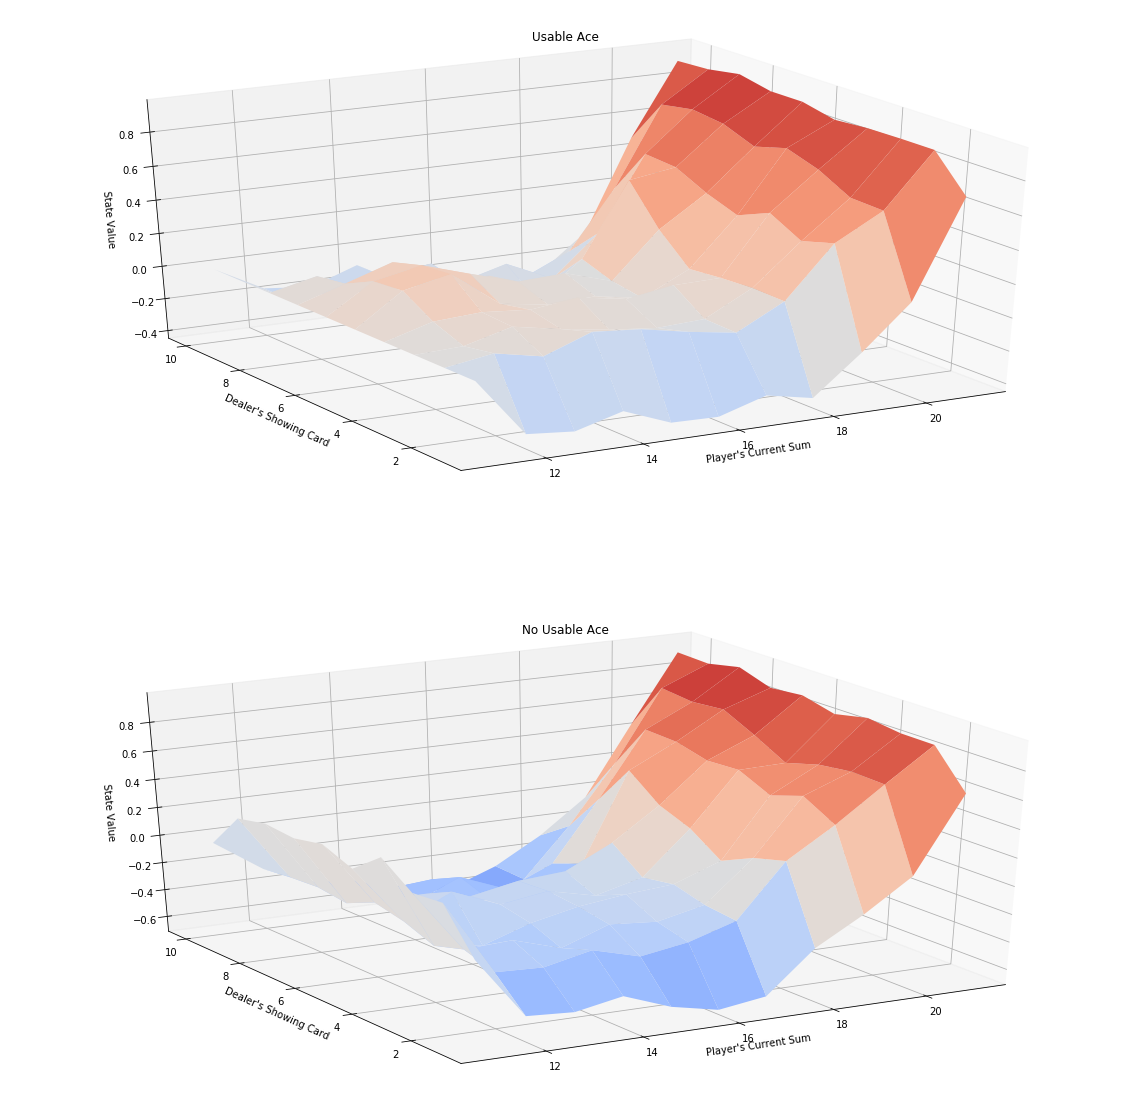

In [422]:
# obtain the corresponding state-value function
V = dict((k,np.max(v)) for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V)

Finally, we can also visualize the policy that is estimated to be optimal,

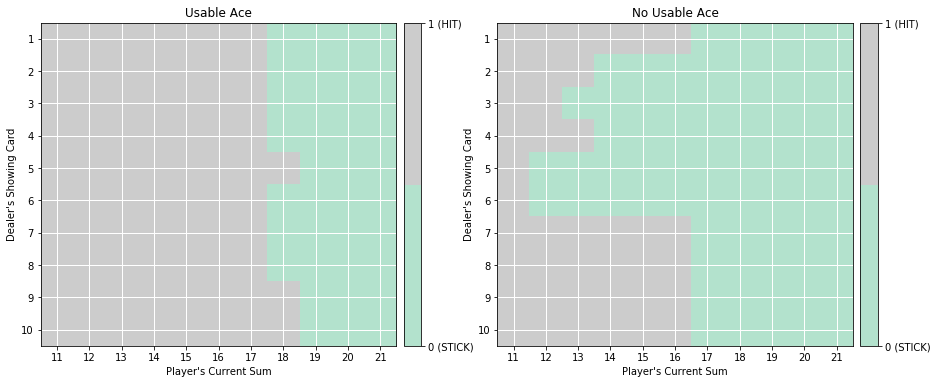

In [423]:
# plot the policy
plot_policy(policy)

The **true** optimal policy $\pi_*$ can be found below,

![True Optimal Policy](images/optimal.png)

We are not too far from the solution. Next we will tweak the algorithm using some of the insights from the Model-based approach in order to further optimise the process in terms of efficiently capturing signal from the environment.

We will also in the process create a Model-free approach that can calculate off-policy solutions. We can start to easily distinguish between the policy that we use to capture information - *explore* the environment - and the policy we ultimately want to use  - *exploit* the environment.   

### Temporal-Difference Learning

If we have a second look at the update rule from the *MC Control* method this time for a specific step between time $t$ and time $t+1$ in an episode trajectory $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$,

$$
q(S_t,A_t) \leftarrow q(S_t,A_t) + \alpha(G_t - q(S_t,A_t)),
$$
and expand $G_t$ also once again,

$$
G_t = R_{t+1} + \gamma \cdot R_{t+2} + \gamma^2 \cdot R_{t+3} + \gamma^3 \cdot R_{t+4} + \dots, 
$$
we can rewrite the update rule as,

$$
q(S_t,A_t) \leftarrow q(S_t,A_t) + \alpha(R_{t+1} + \gamma \cdot R_{t+2} + \gamma^2 \cdot R_{t+3} + \gamma^3 \cdot R_{t+4} + \dots - q(S_t,A_t)),
$$

$$q(S_t,A_t) \leftarrow q(S_t,A_t) + \alpha(R_{t+1} + \gamma \cdot G_{t+1} - q(S_t,A_t))$$



In the update equation above $G_{t+1}$ is an estimate of the reward the agent will capture when at state $S_{t+1}$ performing action $A_{t+1}$. But after a few runs we have a better estimate of that expected reward provided by the value-action function $q(S_{t+1}, A_{t+1})$ than the estimate provided by the reward function $G_{t+1}$ on just one single episode information. 

Altering the update rule to include instead the information accummulated in the value-action function $q$ at each update step makes the learning process more efficient,

$$
q(S_t,A_t) \leftarrow q(S_t,A_t) + \alpha(R_{t+1} + \gamma \cdot q(S_{t+1}, A_{t+1}) - q(S_t,A_t))
$$

It is at this stage that we can think more carefully about which value we want to capture in the *update equation*. If our *target policy* is the *greedy policy* $\pi_*$ we can choose to update with the action-value function $q$ at $S_{t+1}$ that provides the value of the *target policy* - $q(S_{t+1}, \pi_*(S_{t+1}))$ rather than $q(S_{t+1}, A_{t+1})$ where $A_{t+1}$ can be yielded by a different *exploring policy* - like a $\epsilon$-greedy policy $\pi_{\epsilon}$ - that is not our target policy and ultimately we are not interested in its action-value function $q_{\pi_\epsilon}$.

#### Q-learning

The development of an off-policy TD control algorithm known as **Q-learning** by [Christopher Watkins](https://www.cs.rhul.ac.uk/home/chrisw/new_thesis.pdf) in 1989 was one of the early breakthroughs in reinforcement learning. Nowadays, the method is also know as *SARSA Max* or *TD(0)*.

The updating rule reads,

$$
q(S_t,A_t) \leftarrow q(S_t,A_t) + \alpha(R_{t+1} + \gamma \cdot q(S_{t+1},\pi_*(S_{t+1}) ) - q(S_t,A_t))
$$

Knowing that $\pi_*(S_{t+1}) = \smash{\displaystyle argmax_{a}} q(S_{t+1}, a)$, we can write the update rule as,

$$
q(S_t,A_t) \leftarrow q(S_t,A_t) + \alpha(R_{t+1} + \gamma \cdot \max_{a} q(S_{t+1},a)  - q(S_t,A_t))
$$

Next, we will test the efficiency of this algorithm by applying it to the game of *Blackjact* that we tried to solve earlier.  

In [5]:
def epsilon_greedy(Q, state, nA, eps):
    """Selects epsilon-greedy action for supplied state.
    
    Params
    ======
        Q (dictionary): action-value function
        state (int): current state
        nA (int): number actions in the environment
        eps (float): epsilon
    """
    if random.random() > eps: # select greedy action with probability epsilon
        return np.argmax(Q[state])
    else:                     # otherwise, select an action randomly
        return random.choice(np.arange(env.action_space.n))

In [6]:
def update_Q_sarsamax(alpha, gamma, Q, state, action, reward, done, next_state=None):
    """Returns updated Q-value for the most recent experience."""
    current = Q[state][action]  # estimate in Q-table (for current state, action pair)
     
    if done:
        target = reward
    else:
        Qsa_next = np.max(Q[next_state]) if next_state is not None else 0  # value of next state
        target = reward + (gamma * Qsa_next)               # construct TD target
    new_value = current + (alpha * (target - current)) # get updated value 
    return new_value

In [27]:
def q_learning(env, num_episodes, alpha, gamma=1.0, eps_start=1.0, eps_decay=.99999, eps_min=0.01, plot_every=100, Q_start=None, ne_sofar=0):
    """Q-Learning - TD Control
    
    Params
    ======
        num_episodes (int): number of episodes to run the algorithm
        alpha (float): learning rate
        gamma (float): discount factor
        plot_every (int): number of episodes to use when calculating average score
    """
    nA = env.action_space.n                # number of actions
    if Q_start == None:
        Q = defaultdict(lambda: np.zeros(nA))
    else:
        Q = Q_start          # initialize empty dictionary of arrays
    epsilon = max(eps_start*eps_decay**ne_sofar, eps_min)
    # monitor performance
    tmp_scores = deque(maxlen=plot_every)     # deque for keeping track of scores
    avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
    
    for i_episode in range(1+ne_sofar, num_episodes+1+ne_sofar):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes+ne_sofar), end="")
            sys.stdout.flush()
        score = 0                                              # initialize score
        state = env.reset()                                    # start episode
        epsilon = max(epsilon*eps_decay, eps_min)              # set value of epsilon
        
        
        while True:
            action = epsilon_greedy(Q, state, nA, epsilon)     # epsilon-greedy action selection
            next_state, reward, done, info = env.step(action)  # take action A, observe R, S'
            score += reward                                    # add reward to agent's score
            Q[state][action] = update_Q_sarsamax(alpha, gamma, Q, state, action, reward, done, next_state)        
            state = next_state                                 # S <- S'
            if done:
                tmp_scores.append(score)                       # append score
                break
        if (i_episode % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
     
    # determine the policy corresponding to the final action-value function estimate
    policy = dict((k,np.argmax(v)) for k, v in Q.items())
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))
    return policy, Q

In [28]:
so_far = 0
more = 350000000
Q = defaultdict(lambda: np.zeros(env.action_space.n))

In [ ]:
import time
t0 = time.time()

policy, Q = q_learning(env, more, .002, Q_start = Q, ne_sofar = so_far)
print("\nElapsed time: ", time.time() - t0)
end = so_far + more
so_far = end
more = 50000000

Episode 656105400/700000000

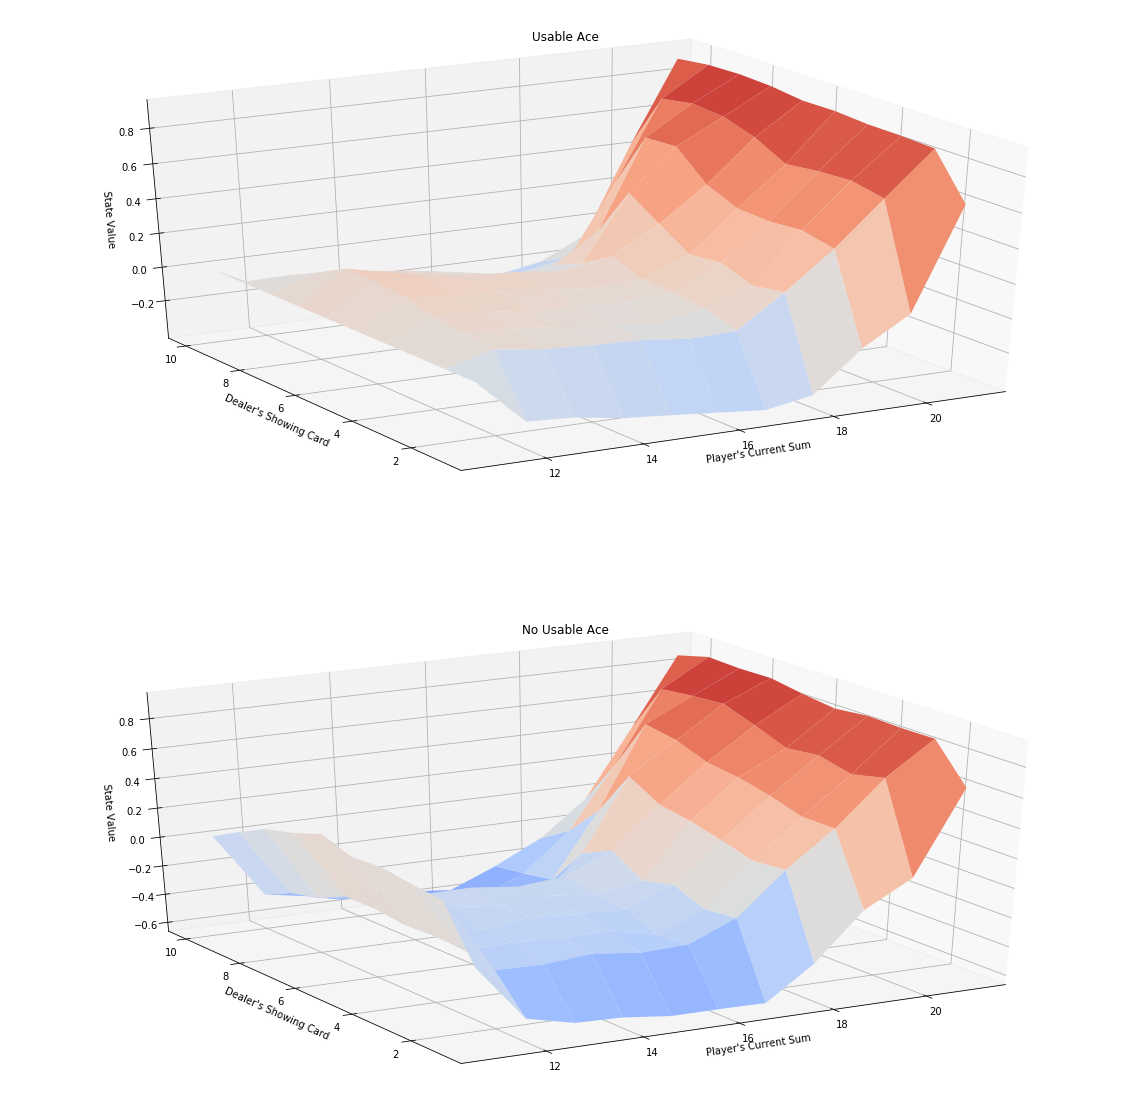

In [48]:
# obtain the corresponding state-value function
V = dict((k,np.max(v)) for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V)

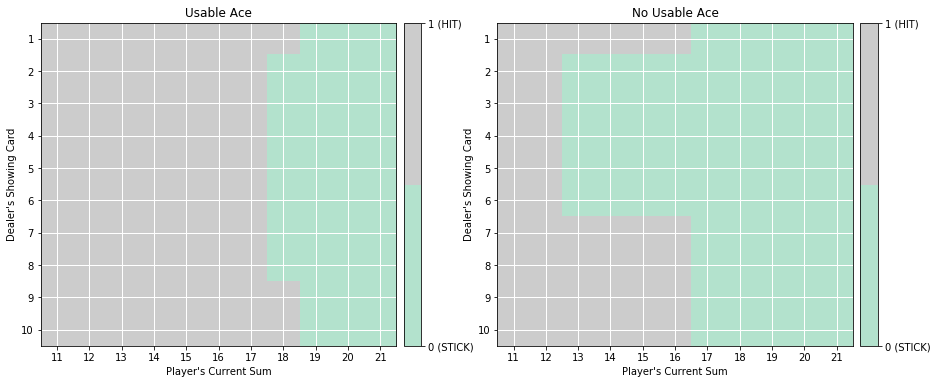

In [49]:
# plot the policy
plot_policy(policy)

The **true** optimal policy $\pi_*$ can be found below,

![True Optimal Policy](images/optimal.png)